In [4]:
import os, glob, h5py, glob, sys, warnings, tqdm
import warnings
from timeit import default_timer as timer
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from pyproj import Transformer
from pyproj import proj

sys.path.append(r'C:\Users\Sebastian\U\Spatial\Internship\Bodo_website\ICESat-2_SVDA-main\python')

#from SVDA_helper_functions import *
from SVDA_functions import *

In [2]:
# Data extraction from ATL03 product (HDF5 formatted files)

#The ATL03_20200320133708_12950614_003_01.h5 file is 4.7GB and is available at https://nsidc.org/data/ATL03
ATL03_input_path = r'C:\Users\Sebastian\U\Spatial\ATL03\ATL03_20191030041540_05080506_005_01.h5'

# Output
ATL03_output_path = r"D:\Datos de Usuario\Univ\Semester_4\Internship_thesis\hdf"

#Region of interest to be clipped from ATL08 file:
ROI_fname = r'C:\Users\Sebastian\U\Spatial\Internship\NSIDC\new_study_area\new_area-polygon.shp'
EPSG = 'epsg:7763'

In [4]:
#Creating Dataframes for all ATL03 datasets
ATL03_land_files = glob.glob(os.path.join(ATL03_output_path, 'ATL03_Land_*.hdf'))
ATL03_land_files.sort()
HDF_files = []
for i in range(len(ATL03_land_files)):
    ATL03_df = pd.read_hdf(ATL03_land_files[i], mode='r')
    ATL03_df = ATL03_df.iloc[::100, :]
    HDF_files.append(ATL03_df)

In [6]:
#Splitting the dataframes in order to plot them
ATL03_20220807155318 = HDF_files[0:6]
ATL03_20220701173348 = HDF_files[6:12]
ATL03_20220705172532 = HDF_files[12:18]
ATL03_20220730160956 = HDF_files[18:24]
ATL03_20220803160136 = HDF_files[24:30]
ATL03_20220709171711 = HDF_files[30:36]
ATL03_20220828144602 = HDF_files[36:42]

ATL03_20220807155318 = pd.concat(ATL03_20220807155318, axis=0)
ATL03_20220701173348 = pd.concat(ATL03_20220701173348, axis=0)
ATL03_20220705172532 = pd.concat(ATL03_20220705172532, axis=0)
ATL03_20220730160956 = pd.concat(ATL03_20220730160956, axis=0)
ATL03_20220803160136 = pd.concat(ATL03_20220803160136, axis=0)
ATL03_20220709171711 = pd.concat(ATL03_20220709171711, axis=0)
ATL03_20220828144602 = pd.concat(ATL03_20220828144602, axis=0)

All_files = [ATL03_20220807155318, ATL03_20220701173348, ATL03_20220705172532, ATL03_20220730160956, 
             ATL03_20220803160136, ATL03_20220709171711, ATL03_20220828144602]

Names_beams = ["ATL03_20220807155318", "ATL03_20220701173348", "ATL03_20220705172532", 
               "ATL03_20220730160956", "ATL03_20220803160136", "ATL03_20220709171711", 
               "ATL03_20220828144602"]

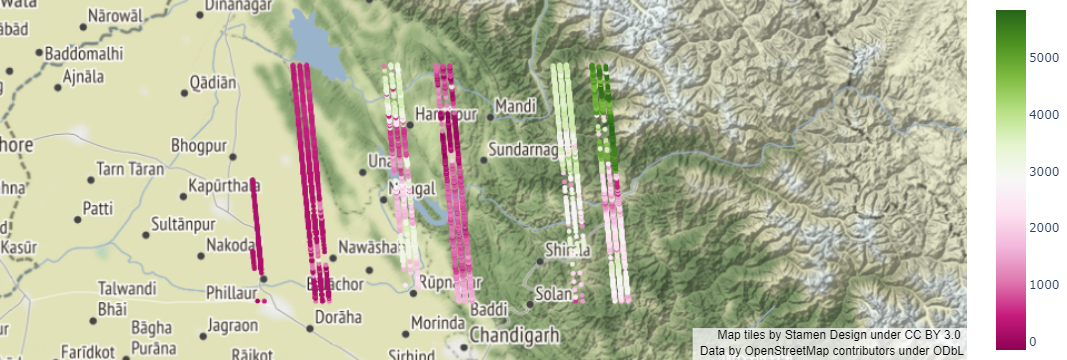

In [9]:
import plotly.express as px
import plotly.graph_objects as go
                        
fig1 = px.scatter_mapbox(All_files[0], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)
fig2 = px.scatter_mapbox(All_files[1], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)
fig3 = px.scatter_mapbox(All_files[2], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)
fig4 = px.scatter_mapbox(All_files[3], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)
fig5 = px.scatter_mapbox(All_files[4], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)
fig6 = px.scatter_mapbox(All_files[5], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)
fig7 = px.scatter_mapbox(All_files[6], 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Photon_Height', zoom=9)

fig_t = go.Figure(data=fig1.data + fig2.data + fig3.data + fig4.data + fig5.data + fig6.data + fig7.data)
fig_t.update_layout(mapbox_style="stamen-terrain")

fig_t.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_t.show();